In [1]:
# solve the equation:          u_t + c*u_x = 0
# periodic boundary condition: u(0,t) = u(L,t)
# initial condition:           u = u0 at t=0
# Then the true solution:      u(x,t) = u0(x-ct) 

In [2]:
import numpy             as np
import matplotlib.pyplot as plt 

In [3]:
# upwind
scale = [1,2,4,8,16,32,64,126]
error = np.array([])
for i in scale:
    c   = 1
    L   = 2*np.pi
    nx  = i*100
    dx  = L/nx
    xg  = np.linspace(0,L,nx,endpoint=False)
    T   = 10
    nt  = i*200 + 1
    dt  = T/(nt-1)
    tg  = np.linspace(0,T,nt)
    
    usave      = np.zeros((nt,nx))
    ut         = np.sin(xg)+1
    usave[0,:] = ut
    for i in np.arange(1,nt):
        uold = ut.copy()
        ur   = np.roll(uold,-1)
        ul   = np.roll(uold, 1)
        unew = uold - c*dt/dx*(uold - ul)
        ut   = unew.copy()
        usave[i,:] = ut
    
    uref = np.sin(xg - c*T)+1
    error = np.append(error,np.amax(np.absolute(ut - uref)))
    

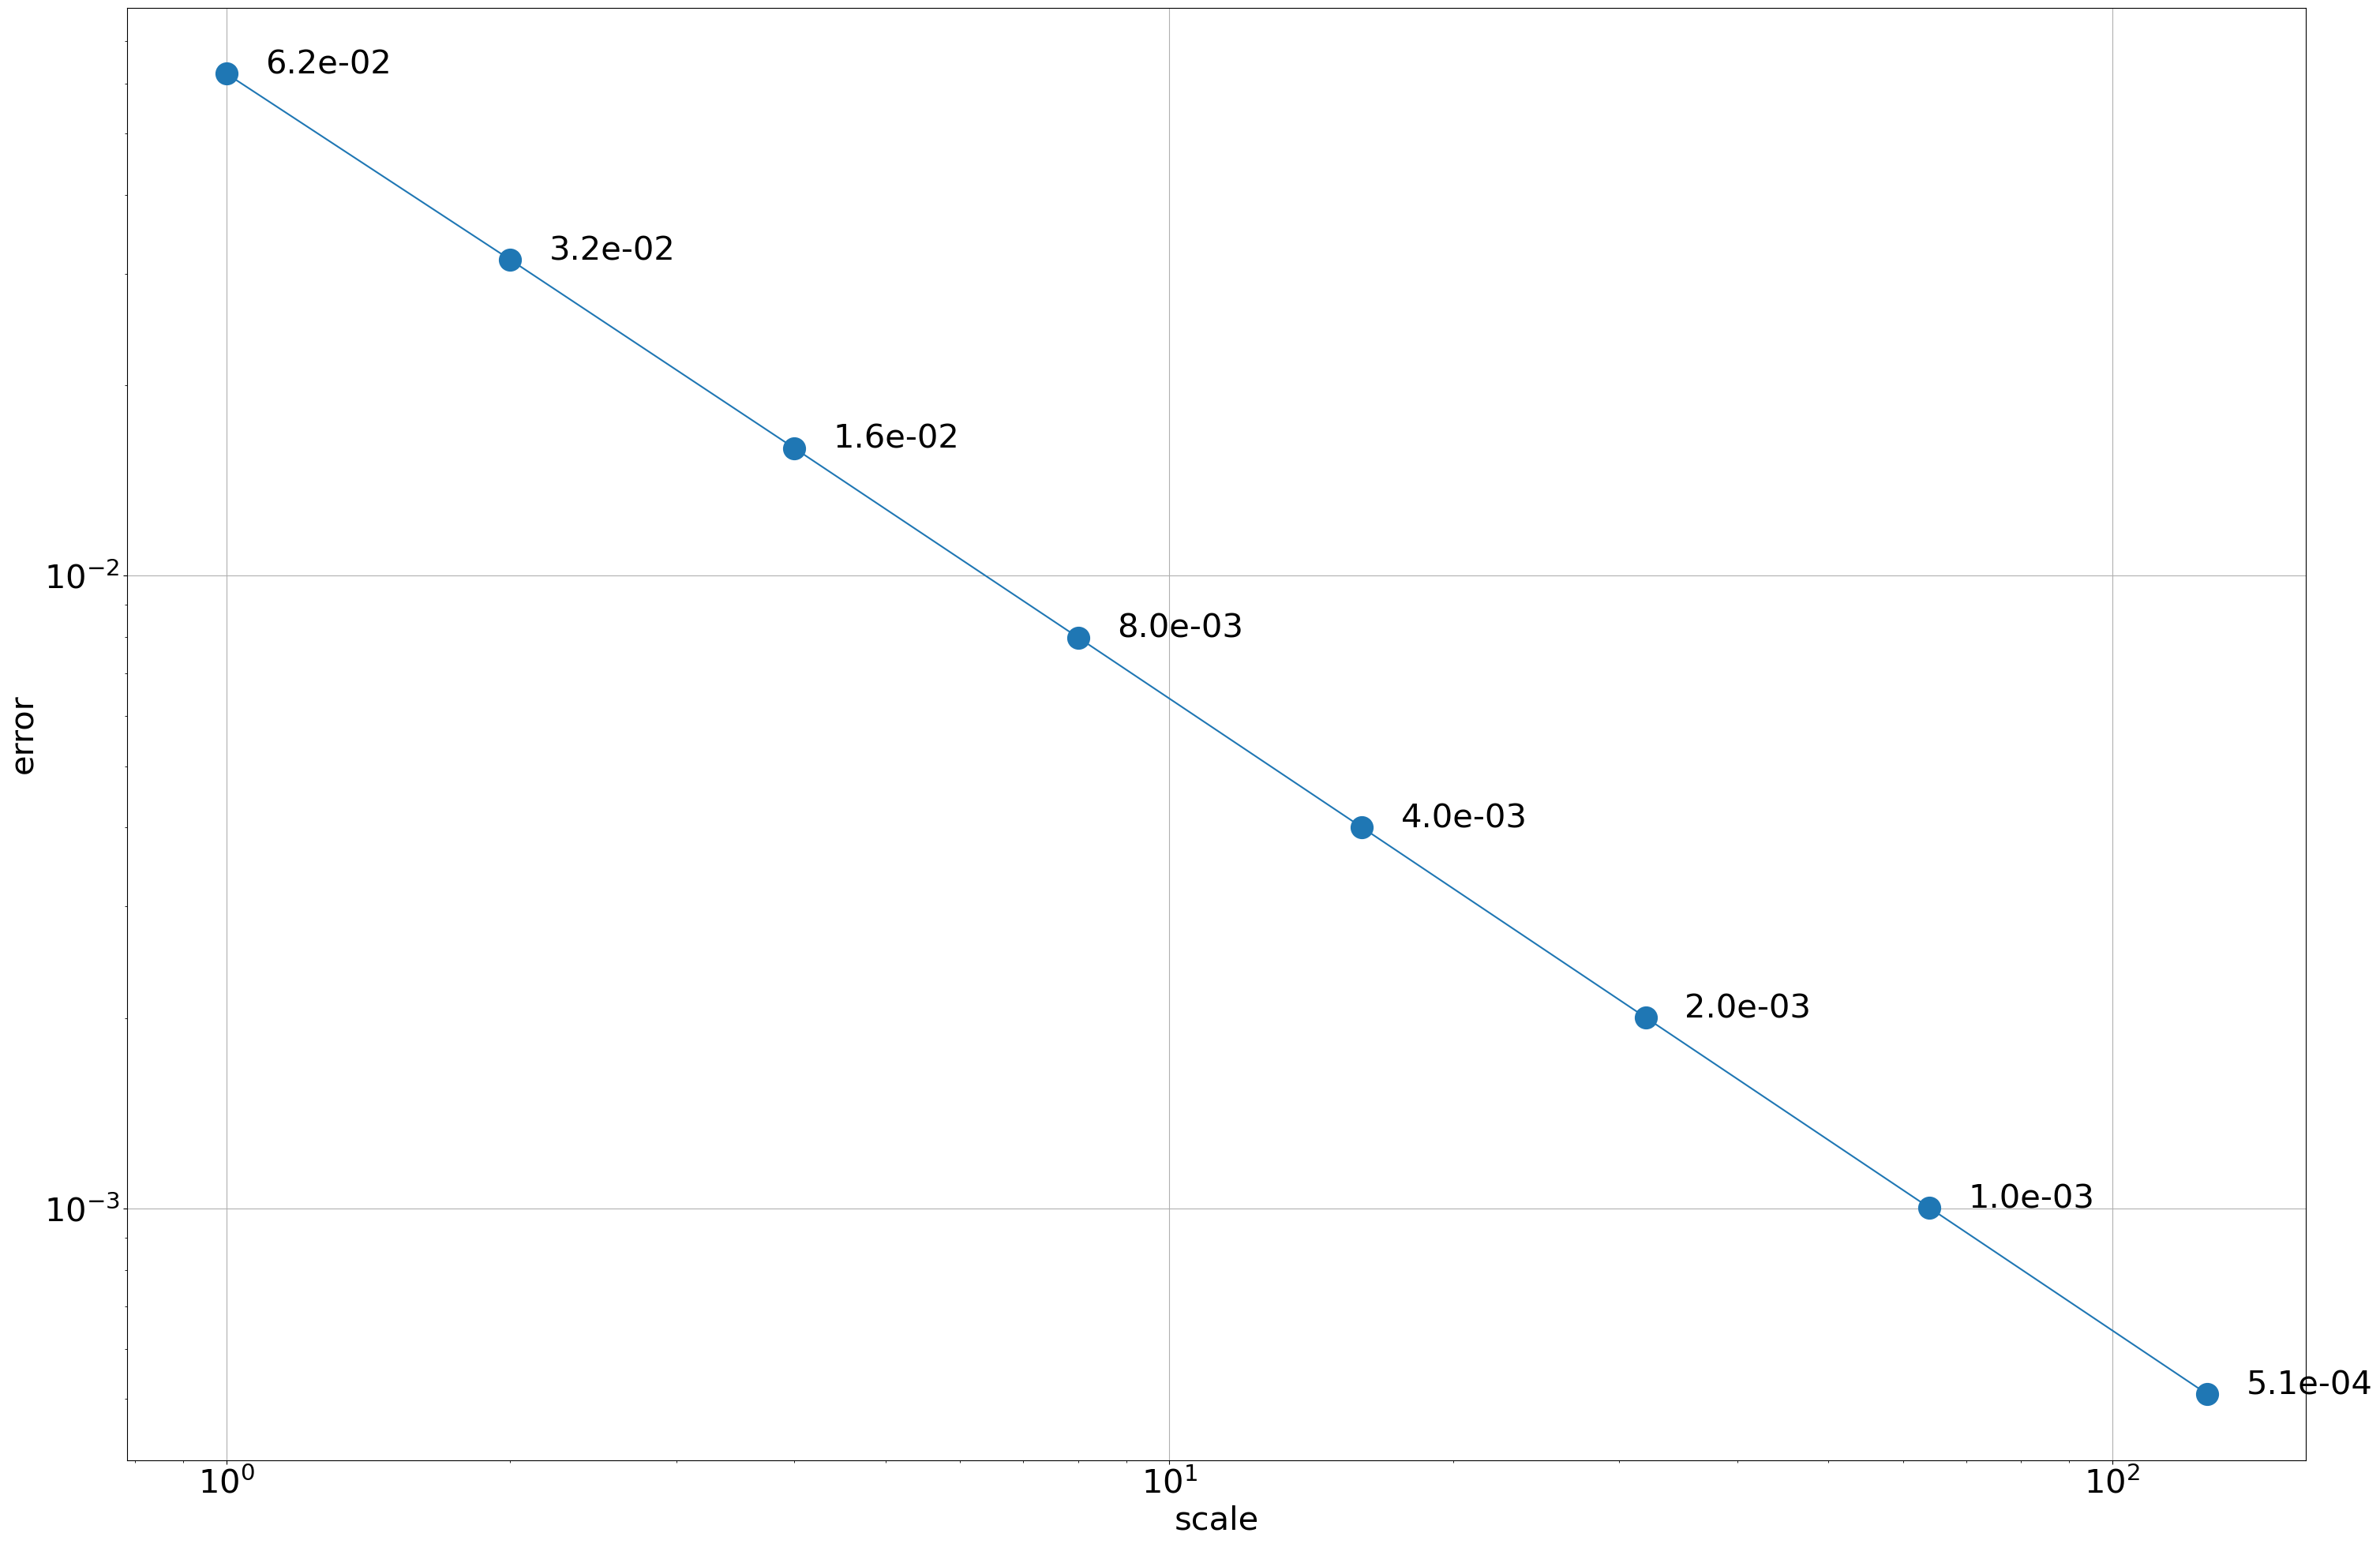

In [40]:
fig, ax = plt.subplots(figsize=(30,20)) 
plt.subplots_adjust(left=0.050,bottom=0.050,right=0.970,top=0.970,wspace=0.06,hspace=0.07)
plt.rcParams['font.size'] = '30'

ax.plot(scale,error,'o-',ms=20)
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid()
ax.set_xlabel('scale')
ax.set_ylabel('error')
ax.text(1.1*scale[0],error[0],f'{error[0]:.1e}')
ax.text(1.1*scale[1],error[1],f'{error[1]:.1e}')
ax.text(1.1*scale[2],error[2],f'{error[2]:.1e}')
ax.text(1.1*scale[3],error[3],f'{error[3]:.1e}')
ax.text(1.1*scale[4],error[4],f'{error[4]:.1e}')
ax.text(1.1*scale[5],error[5],f'{error[5]:.1e}')
ax.text(1.1*scale[6],error[6],f'{error[6]:.1e}')
ax.text(1.1*scale[7],error[7],f'{error[7]:.1e}')

plt.savefig('solve_1D_linear_convergence.png')